## Importing Packages 

* First we import all the packages that will be used in the assignment.

* Since Keras is integrated in TensorFlow 2.x, we import `keras` from `tensorflow` and use `tenserflow.keras.xxx` to import all other Keras packages. The seed argument produces a deterministic sequence of tensors across multiple calls.

In [ ]:
!pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 30.3 MB/s 
     |████████████████████████████████| 1.6 MB 53.5 MB/s 


In [ ]:
#Ignore Warning
import warnings
warnings.filterwarnings("ignore") 
# set up notebook to display multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
import datetime
from packaging import version
from collections import Counter
import math
import numpy as np
import pandas as pd

from timeit import default_timer as timer
import time
from datetime import timedelta
import os # Operation System
import matplotlib as mpl  # EA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

from tqdm import tqdm
import cv2

import tensorflow as tf
import keras_tuner as kt
from keras.layers import Lambda, Input
from keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

In [ ]:
%matplotlib inline
np.set_printoptions(precision=3, suppress=True) 

## Verify TensorFlow version and Keras version

In [ ]:
print("This notebook requires TensorFlow 2.0 or above")
print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >=2
print("Keras version: ", keras.__version__)

This notebook requires TensorFlow 2.0 or above
TensorFlow version:  2.9.2
Keras version:  2.9.0


## Mount Google Drive to Colab environment

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/MSDS 462/Final Project - Brain Tumor Classification/
!pwd
#!ls
print('Working Directory')
print(os.getcwd())
work_dir = "/content/gdrive/My Drive/MSDS 462/Final Project - Brain Tumor Classification/"

/content/gdrive/My Drive/MSDS 462/Final Project - Brain Tumor Classification
/content/gdrive/My Drive/MSDS 462/Final Project - Brain Tumor Classification
Working Directory
/content/gdrive/My Drive/MSDS 462/Final Project - Brain Tumor Classification


In [ ]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

In [ ]:
Xtrain = []
ytrain = []
image_size = 150
for i in labels:
    folderPath = os.path.join(work_dir + 'Dataset/Brain-Tumor-Classification-DataSet-master','Training',str(i))
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        #img = cv2.resize(img,(image_size, image_size))
        Xtrain.append(img)
        ytrain.append(i)
        
X_train = np.array(Xtrain)
y_train = np.array(ytrain)

100%|██████████| 827/827 [00:14<00:00, 56.09it/s] 


In [ ]:
X_train.shape
y_train.shape

(2870,)

(2870,)

In [ ]:
Xtest = []
ytest = []
image_size = 150
for i in labels:
    folderPath = os.path.join(work_dir + 'Dataset/Brain-Tumor-Classification-DataSet-master','Testing',str(i))
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        Xtest.append(img)
        ytest.append(labels_dict[i])
        
X_test = np.array(Xtest)
y_test = np.array(ytest)

  0%|          | 0/100 [00:01<?, ?it/s]


ValueError: ignored

In [ ]:
X_test.shape
y_test.shape

(394,)

(394,)

In [ ]:
# def get_dims(im):
#   '''Returns dimenstions for an RBG image'''
#   arr = np.array(im)
#   h,w,d = arr.shape
#   return h,w

In [ ]:
# directories = {'glioma_tumor': 'glioma_tumor/',
# 'no_tumor': 'no_tumor/',
# 'meningioma_tumor': 'meningioma_tumor/',
# 'pituitary_tumor': 'pituitary_tumor/'}

In [ ]:
# import dask.bag as bag
# from PIL import Image

In [ ]:
# for n,d in directories.items():
#   filepath = d
#   filelist = [filepath + f for f in os.listdir(work_dir + 'Dataset/Brain-Tumor-Classification-DataSet-master/Training')]
#   print
#   dims = bag.from_sequence(filelist).map(get_dims)
#   #with diagnostics.ProgressBar():
#   dims = dims.compute()
#   dim_df = pd.DataFrame(dims, columns=['height', 'width'])
#   sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
#   sizes.plot.scatter(x='width', y='height');
#   plt.title('Image Sizes (pixels) | {}'.format(n))

['meningioma_tumor', 'pituitary_tumor', 'no_tumor', 'glioma_tumor']


FileNotFoundError: ignored

In [ ]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']

Text(0.4, 0.62, 'Brain Tumor MRI Image From Each Label')

Text(0.5, 1.0, 'glioma_tumor')

(-0.5, 149.5, 149.5, -0.5)

Text(0.5, 1.0, 'no_tumor')

(-0.5, 149.5, 149.5, -0.5)

Text(0.5, 1.0, 'meningioma_tumor')

(-0.5, 149.5, 149.5, -0.5)

Text(0.5, 1.0, 'pituitary_tumor')

(-0.5, 149.5, 149.5, -0.5)

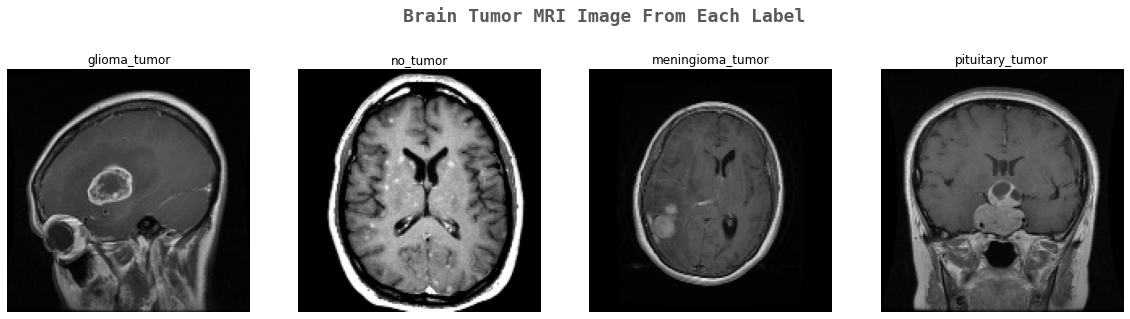

In [ ]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Brain Tumor MRI Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.62,x=0.4,alpha=0.8)
for i in labels:
  j=0
  while True :
    if y_train[j]==i:
      ax[k].imshow(X_train[j])
      ax[k].set_title(y_train[j])
      ax[k].axis('off')
      k+=1
      break
    j+=1

([<matplotlib.patches.Wedge at 0x7f03d9b4c090>,
 [Text(-0.46093571363192787, 0.9987683754998581, ''),
  Text(-1.079418083105365, -0.21179377201688293, ''),
  Text(0.45546229811202066, -1.0012762331137781, ''),
  Text(0.8652446039690522, 0.6792288092406255, '')],
 [Text(-0.35617759689739875, 0.7717755628862539, '13.8%'),
  Text(-0.8340957914905093, -0.1636588238312277, '28.6%'),
  Text(0.35194813945019776, -0.7737134528606466, '28.8%'),
  Text(0.6685981030669949, 0.5248586253223014, '28.8%')])

Text(0.5, 1.0, 'Image Label Distribution in Brain Tumor Train Set')

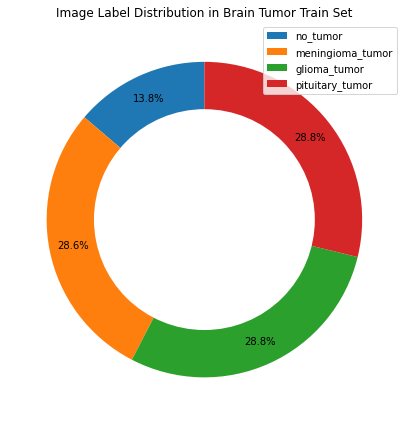

In [ ]:
df= pd.DataFrame(y_train, columns=['label'])

values = df['label'].value_counts().sort_values(ascending = True)

colors = sns.color_palette()

#create pie chart to see the distribution of label variable of interest
plt.pie(values, colors = colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
plt.legend(values.index, loc="best")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.set_size_inches(6,6)
# Equal aspect ratio ensures that pie is drawn as a circle 
plt.title("Image Label Distribution in Brain Tumor Train Set") 
plt.tight_layout()
plt.show()

## Train, Test and Validation split

In [ ]:
X_train_split,X_valid,y_train_split,y_valid = train_test_split(X_train,y_train, test_size=0.2,random_state=42,shuffle=True)

In [ ]:
print('x_train_split:\t{}'.format(X_train_split.shape))
print('y_train_split:\t{}'.format(y_train_split.shape))
print('x_valid:\t\t{}'.format(X_valid.shape))
print('y_valid:\t\t{}'.format(y_valid.shape))

x_train_split:	(2296, 150, 150, 3)
y_train_split:	(2296,)
x_valid:		(574, 150, 150, 3)
y_valid:		(574,)
